In [ ]:
#hannah desc stats

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
train2 = pd.read_csv('D:/Summer Practicum/1_Data/training_regression.csv')
airlines = train2[train2["Operating_Airline"].isin(['B6', 'F9', 'G4'])]

#### Distance

In [48]:
distance_df = airlines[['Operating_Airline', 'DistanceGroup']]
airline_counts = airlines.groupby(["Operating_Airline"]).size().reset_index()
#jet blue
b6 = distance_df[distance_df['Operating_Airline'] == "B6"]
b6_distance_groups = b6.groupby(['DistanceGroup']).value_counts().reset_index()
b6_distance_groups['prop'] = b6_distance_groups['count'] / len(b6)
#frontier
f9 = distance_df[distance_df['Operating_Airline'] == "F9"]
f9_distance_groups = f9.groupby(['DistanceGroup']).value_counts().reset_index()
f9_distance_groups['prop'] = f9_distance_groups['count'] / len(f9)
#allegiant
g4 = distance_df[distance_df['Operating_Airline'] == "G4"]
g4_distance_groups = g4.groupby(['DistanceGroup']).value_counts().reset_index()
g4_distance_groups['prop'] = g4_distance_groups['count'] / len(g4)
#combined
distance_props = pd.concat([b6_distance_groups, f9_distance_groups, g4_distance_groups])


In [63]:
p1 = (ggplot(b6_distance_groups, aes(x = 'DistanceGroup', y = 'prop')) + geom_bar(stat = "identity", fill="#0F6391") + labs(title = "Jet Blue Distance Groups",
       x = "Distance Group",
       y = "Proportion of Flights") + theme_classic() + scale_x_continuous(breaks=np.arange(1,12,1)))
p1.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_distance_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_distance_hist


In [64]:
new_row = pd.Series({'DistanceGroup': 11, 'Operating_Airline': 'F9', 'count':0, 'prop':0.0})
f9_distance_groups2=f9_distance_groups._append(new_row, ignore_index = True)
f9_distance_groups2["DistanceGroup"]=pd.to_numeric(f9_distance_groups2["DistanceGroup"])

p2 = (ggplot(f9_distance_groups2, aes(x = 'DistanceGroup', y = 'prop')) + geom_bar(stat = "identity", fill="#E19B8C") + labs(title = "Frontier Distance Groups",
       x = "Distance Group",
       y = "Proportion of Flights") + theme_classic() + scale_x_continuous(breaks=np.arange(1,12,1)))
p2.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_distance_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_distance_hist


In [65]:
new_row = pd.Series({'DistanceGroup': 10, 'Operating_Airline': 'G4', 'count':0, 'prop':0.0})
g4_distance_groups2=g4_distance_groups._append(new_row, ignore_index = True)
g4_distance_groups2["DistanceGroup"]=pd.to_numeric(g4_distance_groups2["DistanceGroup"])
new_row = pd.Series({'DistanceGroup': 11, 'Operating_Airline': 'G4', 'count':0, 'prop':0.0})
g4_distance_groups2=g4_distance_groups._append(new_row, ignore_index = True)
g4_distance_groups2["DistanceGroup"]=pd.to_numeric(g4_distance_groups2["DistanceGroup"])

p3 = (ggplot(g4_distance_groups2, aes(x = 'DistanceGroup', y = 'prop')) + geom_bar(stat = "identity", fill="#9C2C19") + labs(title = "Allegiant Distance Groups",
       x = "Distance Group",
       y = "Proportion of Flights") + theme_classic() + scale_x_continuous(breaks=np.arange(1,12,1)))
p3.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_distance_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_distance_hist


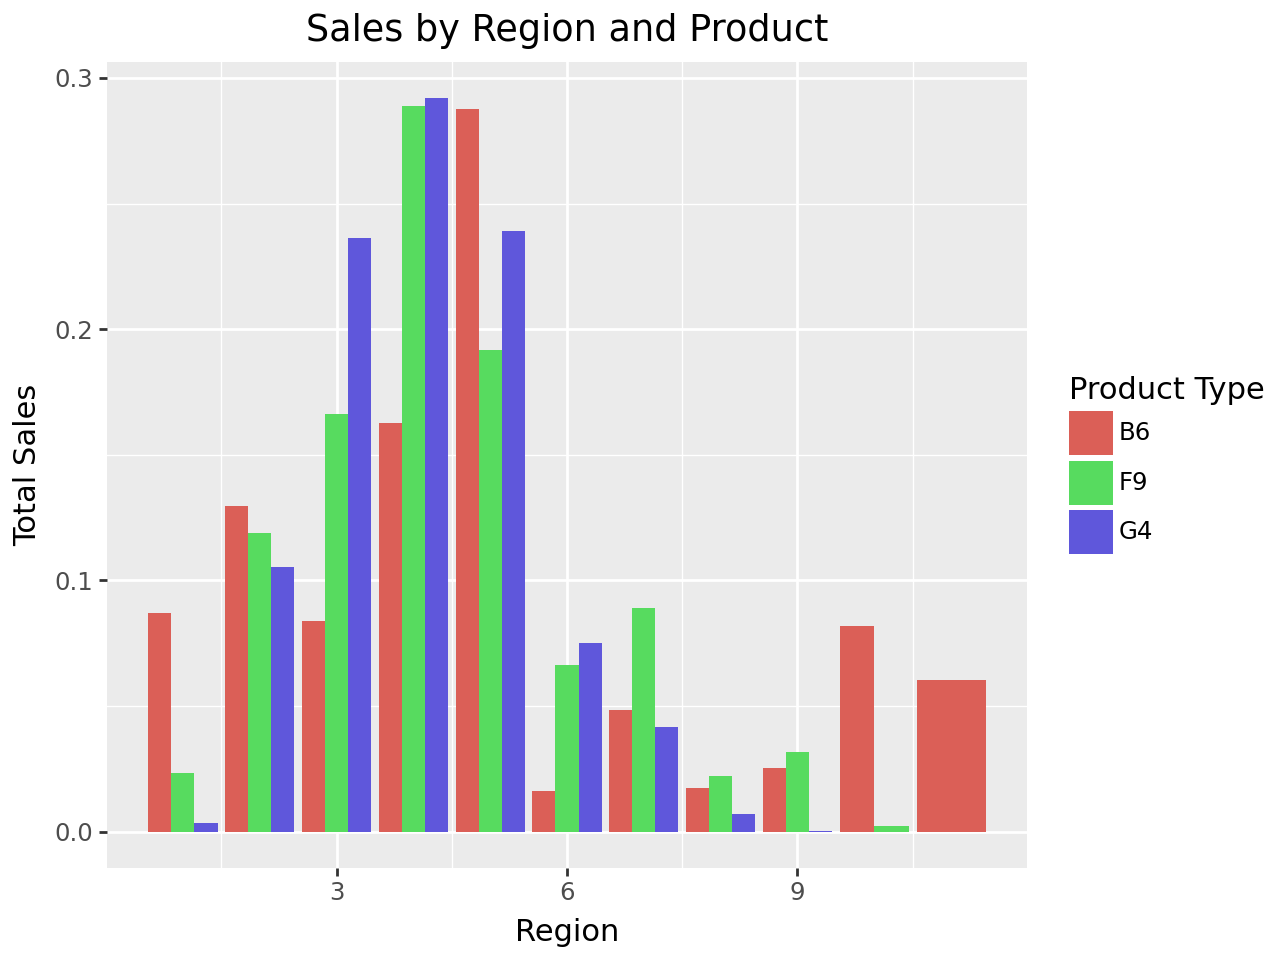

In [10]:
ggplot(distance_props, aes(x = 'DistanceGroup', y = 'prop', fill = 'Operating_Airline')) + geom_bar(stat = "identity", position = "dodge") + labs(title = "Sales by Region and Product",
       x = "Region",
       y = "Total Sales",
       fill = "Product Type")

#### Airport Size Class

In [5]:
size_df = airlines[['Operating_Airline', 'Size_Class']]
airline_counts = airlines.groupby(["Operating_Airline"]).size().reset_index()
#jet blue
b6 = size_df[size_df['Operating_Airline'] == "B6"]
b6_size_groups = b6.groupby(['Size_Class']).value_counts().reset_index()
b6_size_groups['prop'] = b6_size_groups['count'] / len(b6)
b6_size_groups["Size_Class"] = pd.Categorical(b6_size_groups["Size_Class"], categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)
#frontier
f9 = size_df[size_df['Operating_Airline'] == "F9"]
f9_size_groups = f9.groupby(['Size_Class']).value_counts().reset_index()
f9_size_groups['prop'] = f9_size_groups['count'] / len(f9)
f9_size_groups["Size_Class"] = pd.Categorical(b6_size_groups["Size_Class"], categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)
#allegiant
g4 = size_df[size_df['Operating_Airline'] == "G4"]
g4_size_groups = g4.groupby(['Size_Class']).value_counts().reset_index()
g4_size_groups['prop'] = g4_size_groups['count'] / len(g4)
g4_size_groups["Size_Class"] = pd.Categorical(b6_size_groups["Size_Class"], categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)
#combined
#distance_props = pd.concat([b6_size_groups, f9_distance_groups, g4_distance_groups])


In [85]:
p12 = ggplot(b6_size_groups, aes(x = 'Size_Class', y = 'prop')) + geom_bar(stat = "identity", fill="#0F6391") + labs(title = "Jet Blue Size Classes",
       x = "Size Class",
       y = "Proportion of Flights") + theme_classic()
p12.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_size_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_size_hist


In [84]:
p22 = (ggplot(f9_size_groups, aes(x = 'Size_Class', y = 'prop')) + geom_bar(stat = "identity", fill="#E19B8C") + labs(title = "Frontier Size Classes",
       x = "Size Class",
       y = "Proportion of Flights") + theme_classic())
p22.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_size_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_size_hist


In [6]:
p32 = (ggplot(g4_size_groups, aes(x = 'Size_Class', y = 'prop')) + geom_bar(stat = "identity", fill="#0F6391") + labs(title = "Allegiant Size Classes",
       x = "Size Class",
       y = "Proportion of Flights") + theme_classic())
p32.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_size_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_size_hist


#### region

In [7]:
region_df = airlines[['Operating_Airline', 'Region']]
airline_counts = airlines.groupby(["Operating_Airline"]).size().reset_index()
#jet blue
b6 = region_df[region_df['Operating_Airline'] == "B6"]
b6_region_groups = b6.groupby(['Region']).value_counts().reset_index()
b6_region_groups['prop'] = b6_region_groups['count'] / len(b6)
b6_region_groups["Region"] = pd.Categorical(b6_region_groups["Region"]) #, categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)
#frontier
f9 = region_df[region_df['Operating_Airline'] == "F9"]
f9_region_groups = f9.groupby(['Region']).value_counts().reset_index()
f9_region_groups['prop'] = f9_region_groups['count'] / len(f9)
f9_region_groups["Region"] = pd.Categorical(b6_region_groups["Region"]) #, categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)
#allegiant
g4 = region_df[region_df['Operating_Airline'] == "G4"]
g4_region_groups = g4.groupby(['Region']).value_counts().reset_index()
g4_region_groups['prop'] = g4_region_groups['count'] / len(g4)
g4_region_groups["Region"] = pd.Categorical(b6_region_groups["Region"]) #, categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)

In [8]:
p13 = ggplot(b6_region_groups, aes(x = 'Region', y = 'prop')) + geom_bar(stat = "identity", fill="#0F6391") + labs(title = "JetBlue Regions",
       x = "Region",
       y = "Proportion of Flights") + theme_classic()
p13
p13.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_region_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_region_hist


In [4]:
p23 = (ggplot(f9_region_groups, aes(x = 'Region', y = 'prop')) + geom_bar(stat = "identity", fill="#0F6391") + labs(title = "Frontier Regions",
       x = "Region",
       y = "Proportion of Flights") + theme_classic())
p23
p23.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_region_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_region_hist


In [94]:
p33 = (ggplot(g4_region_groups, aes(x = 'Region', y = 'prop')) + geom_bar(stat = "identity", fill="#9C2C19") + labs(title = "Allegiant Regions",
       x = "Region",
       y = "Proportion of Flights") + theme_classic())
p33
p33.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_region_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_region_hist


#### time of day

In [9]:
time_df = airlines[['Operating_Airline', 'hour_of_day']]
airline_counts = airlines.groupby(["Operating_Airline"]).size().reset_index()
#jet blue
b6 = time_df[time_df['Operating_Airline'] == "B6"]
b6_time_groups = b6.groupby(['hour_of_day']).value_counts().reset_index()
b6_time_groups['prop'] = b6_time_groups['count'] / len(b6)
#b6_time_groups["Hour"] = pd.Categorical(b6_region_groups["Region"]) #, categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)
#frontier
f9 = time_df[time_df['Operating_Airline'] == "F9"]
f9_time_groups = f9.groupby(['hour_of_day']).value_counts().reset_index()
f9_time_groups['prop'] = f9_time_groups['count'] / len(f9)
#f9_time_groups["Hour"] = pd.Categorical(b6_region_groups["Region"]) #, categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)
#allegiant
g4 = time_df[time_df['Operating_Airline'] == "G4"]
g4_time_groups = g4.groupby(['hour_of_day']).value_counts().reset_index()
g4_time_groups['prop'] = g4_time_groups['count'] / len(g4)
#g4_time_groups["Hour"] = pd.Categorical(b6_region_groups["Hour"]) #, categories=['Large Hub', "Medium Hub", 'Small Hub', 'Non Hub'], ordered=True)

In [10]:
p14 = ggplot(b6_time_groups, aes(x = 'hour_of_day', y = 'prop')) + geom_bar(stat = "identity", fill="#0F6391") + labs(title = "JetBlue Flights per Hour",
       x = "Hour of Day",
       y = "Proportion of Flights") + theme_classic() + scale_x_continuous(breaks = np.arange(1,25,1))
p14
p14.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_time_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_time_hist


In [113]:
p24 = ggplot(f9_time_groups, aes(x = 'hour_of_day', y = 'prop')) + geom_bar(stat = "identity", fill="#E19B8C") + labs(title = "Frontier Flights per Hour",
       x = "Hour of Day",
       y = "Proportion of Flights") + theme_classic() + scale_x_continuous(breaks = np.arange(1,25,1))
p24
p24.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_time_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_time_hist


In [111]:
p34 = ggplot(g4_time_groups, aes(x = 'hour_of_day', y = 'prop')) + geom_bar(stat = "identity", fill="#9C2C19") + labs(title = "Allegiant Flights per Hour",
       x = "Hour of Day",
       y = "Proportion of Flights") + theme_classic() + scale_x_continuous(breaks = np.arange(1,25,1))
p34
p34.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_time_hist', format='png',dpi=300)

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_time_hist


#### day of week

In [123]:
day_df = airlines[['Operating_Airline', 'DayOfWeek']]
day_names = {
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
    7: 'Sun'
}

# Use the .map() method to create the new column
day_df['day_name'] = day_df['DayOfWeek'].map(day_names)


airline_counts = airlines.groupby(["Operating_Airline"]).size().reset_index()
#jet blue
b6 = day_df[day_df['Operating_Airline'] == "B6"]
b6_day_groups = b6.groupby(['day_name']).value_counts().reset_index()
b6_day_groups['prop'] = b6_day_groups['count'] / len(b6)
b6_day_groups["day_name"] = pd.Categorical(b6_day_groups["day_name"], categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ordered=True)
#frontier
f9 = day_df[day_df['Operating_Airline'] == "F9"]
f9_day_groups = f9.groupby(['day_name']).value_counts().reset_index()
f9_day_groups['prop'] = f9_day_groups['count'] / len(f9)
f9_day_groups["day_name"] = pd.Categorical(b6_day_groups["day_name"], categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ordered=True)
#allegiant
g4 = day_df[day_df['Operating_Airline'] == "G4"]
g4_day_groups = g4.groupby(['day_name']).value_counts().reset_index()
g4_day_groups['prop'] = g4_day_groups['count'] / len(g4)
g4_day_groups["day_name"] = pd.Categorical(b6_day_groups["day_name"], categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ordered=True)

C:\Users\hrenck\AppData\Local\Temp\5\ipykernel_38064\1271804246.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


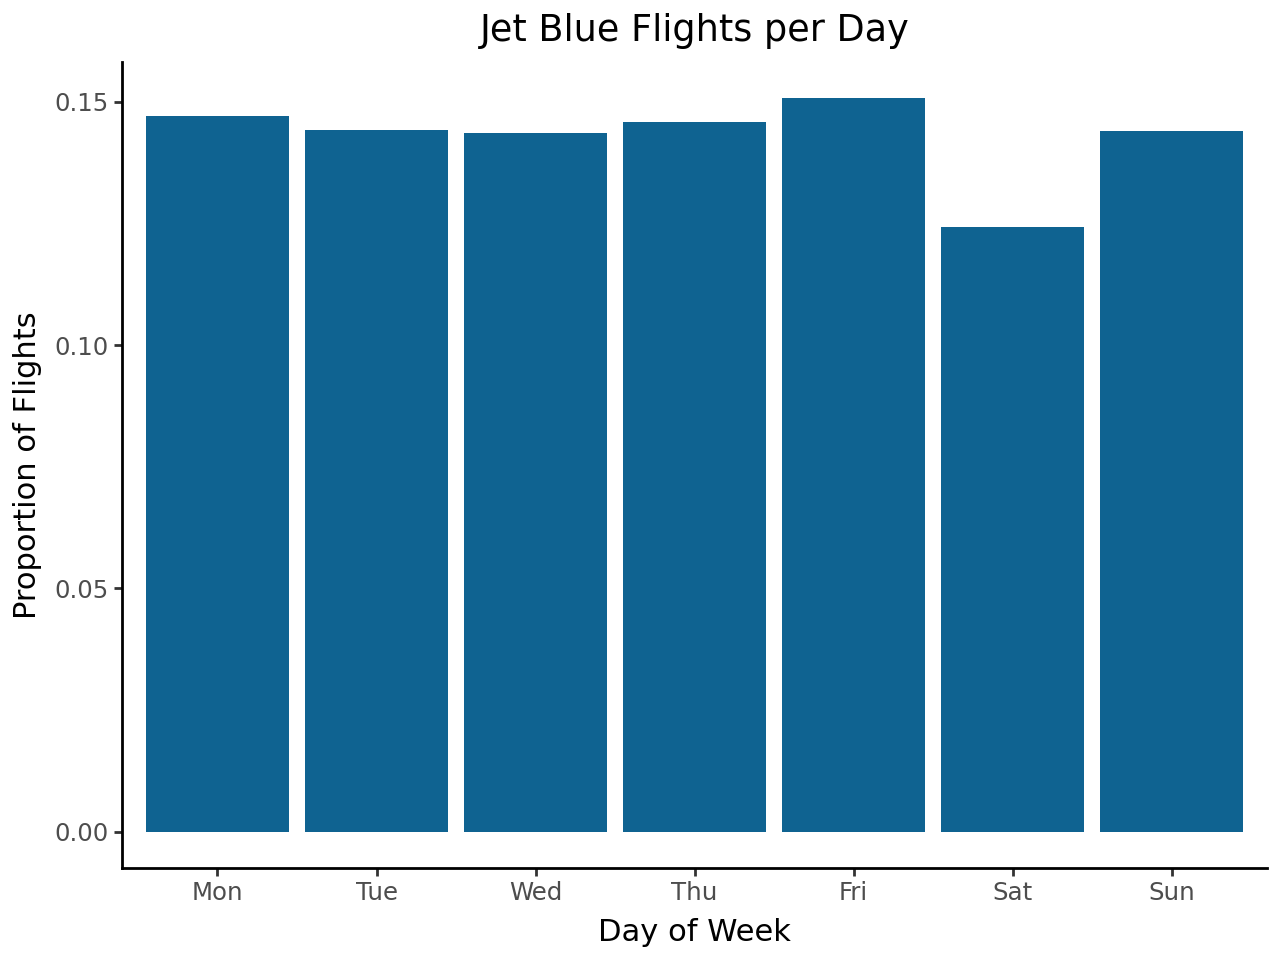

In [ ]:
p15 = ggplot(b6_day_groups, aes(x = 'day_name', y = 'prop')) + geom_bar(stat = "identity", fill="#0F6391") + labs(title = "Jet Blue Flights per Day",
       x = "Day of Week",
       y = "Proportion of Flights") + theme_classic()
p15
#p15.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/b6_day_hist', format='png',dpi=300)

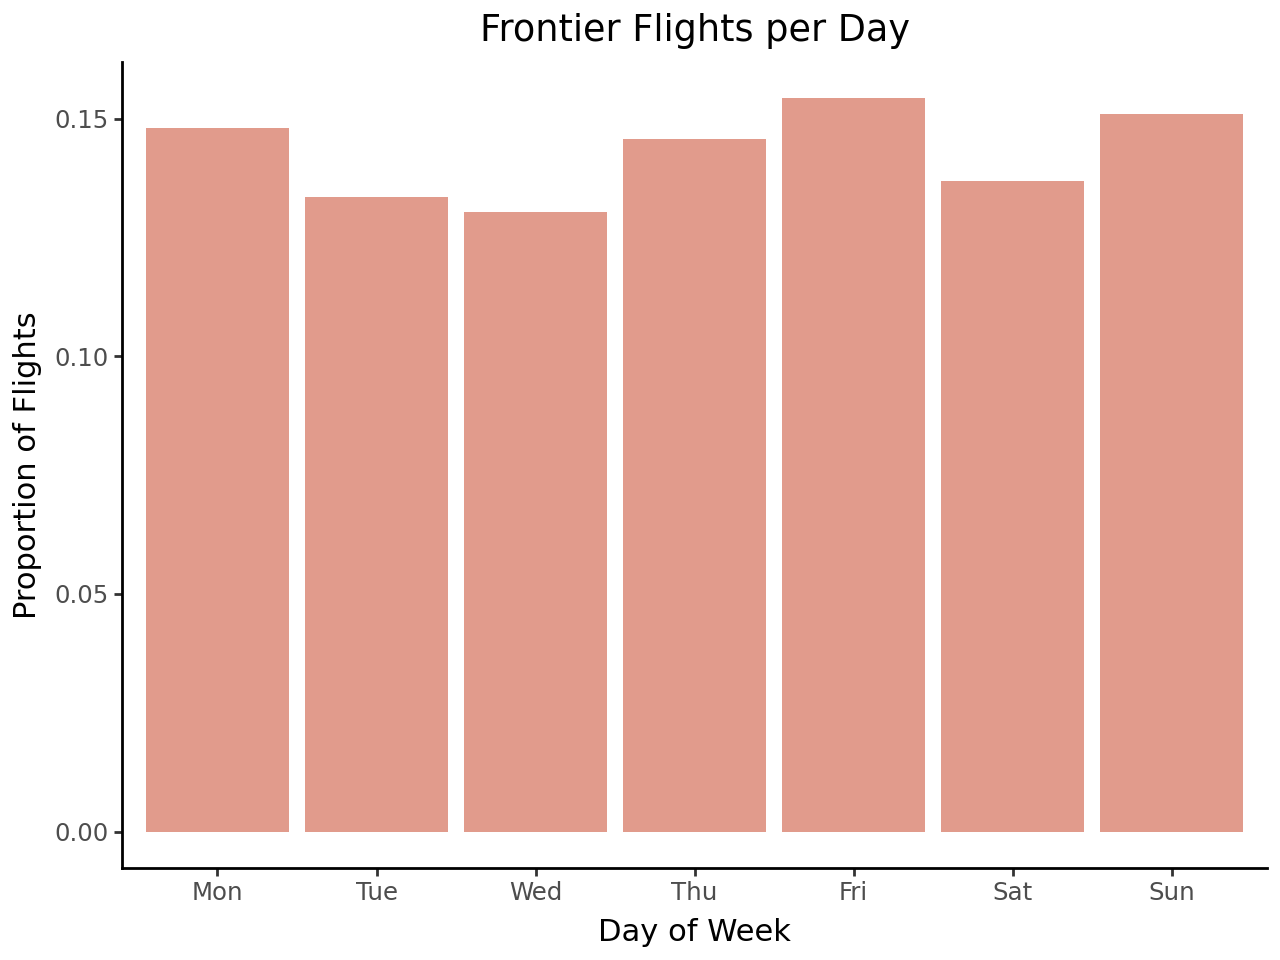

In [127]:
p25 = ggplot(f9_day_groups, aes(x = 'day_name', y = 'prop')) + geom_bar(stat = "identity", fill="#E19B8C") + labs(title = "Frontier Flights per Day",
       x = "Day of Week",
       y = "Proportion of Flights") + theme_classic()
p25
#p25.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/f9_day_hist', format='png',dpi=300)

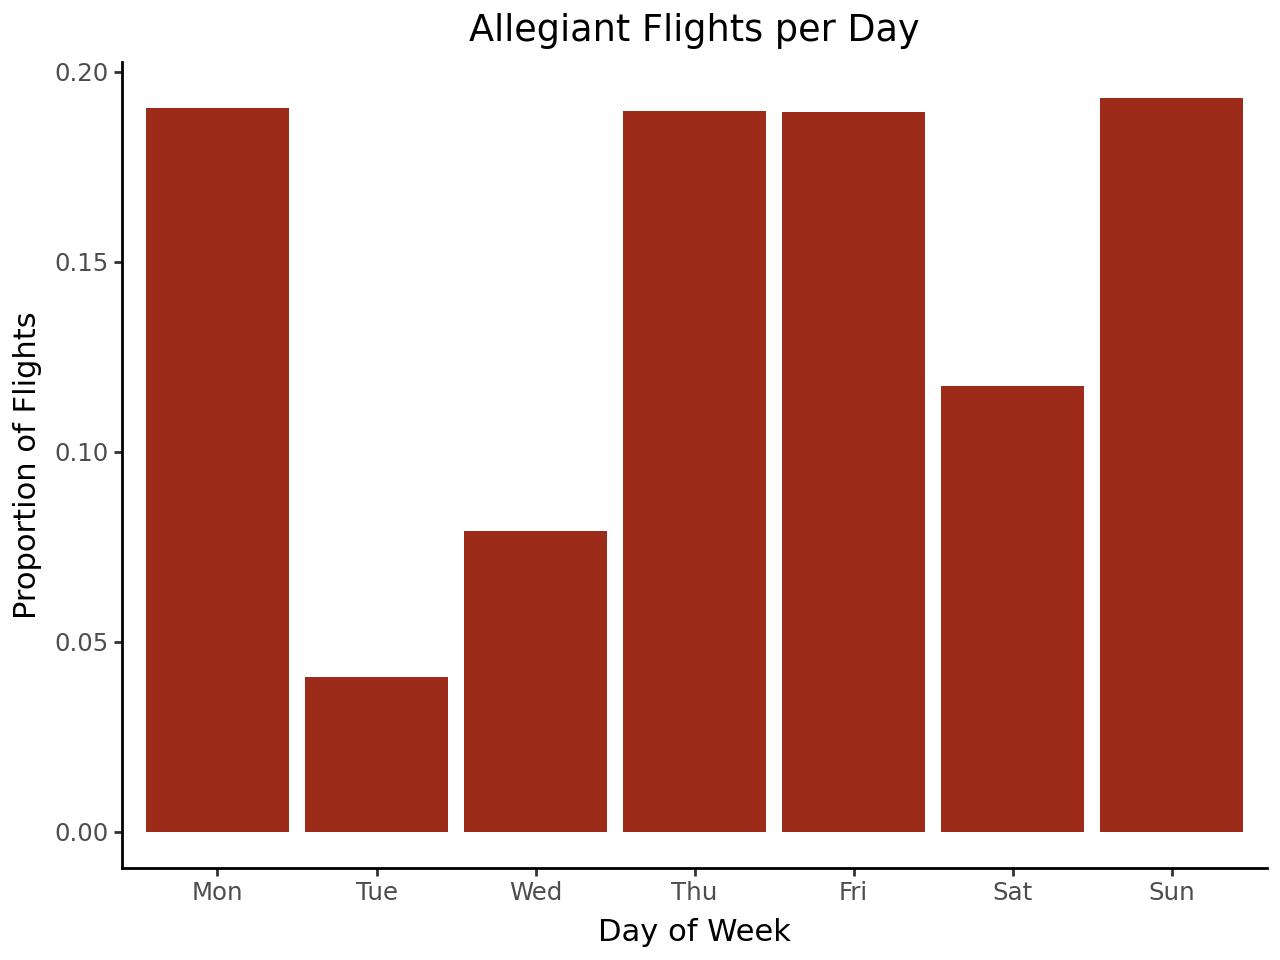

In [128]:
p35 = ggplot(g4_day_groups, aes(x = 'day_name', y = 'prop')) + geom_bar(stat = "identity", fill="#9C2C19") + labs(title = "Allegiant Flights per Day",
       x = "Day of Week",
       y = "Proportion of Flights") + theme_classic()
p35
#p35.save(filename='D:/Summer Practicum/0_Personal_Folders/Hannah Enck/g4_day_hist', format='png',dpi=300)